# Tutorial 3: The Fourier transform

## Agenda
Our agenda for today is to understand:
1. 1D continuous and discrete Fourier transform.
2. 2D continuous and discrete Fourier transform.
3. Fourier basis functions
   - How an image can be built merely from these functions.
4. Frequency-domain filtering
   - High frequency filters
   - Low frequency filters

In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import cv2

## Introduction

### Definition

Let $f:\mathbb{R}^d\rightarrow\mathbb{R}$ be some singal.

The continuous definition of the Fourier transform is

$$
F\left(\mathbf{\xi}\right) = \int_{\mathbb{R}^d} f\left(\mathbf{x}\right) e^{-2\pi i \xi^T \mathbf{x}}d\mathbf{x} = \left<f,\phi_\mathbf{\xi}\right>
$$

where $\phi_\mathbf{\xi}\left(\mathbf{x}\right)=e^{2\pi i \xi^T \mathbf{x}}$ is a periodic wave in the direction of $\mathbf{\xi}$ with the frequency $\left|\mathbf{\xi}\right|$.

In the discrete form we can instead write the above equation as

$$
F\left[\mathbf{\omega}\right] = \sum_{\mathbf{n}\in\mathbb{Z}^d} f\left[\mathbf{n}\right] e^{-2\pi i \mathbf{\omega}^T\mathbf{n}}
$$

where $\omega\in\left[-\frac{1}{2},\frac{1}{2}\right]$. This is called the DFT (discrete Fourier transform).

We will usually refer to $\mathbf{\xi}$ and $\mathbf{\omega}$ as the frequencies, and say that we describe the function in the frequncy domain as opposed to spatial domain.

### Existence

An important question: what are the sufficient conditions for the Fourier transform of a function to be valid?

For the Fourier transform to exist, it is sufficient for a function $f$ to be _absolutely integrable_, i.e.

$$
\left\Vert f\right\Vert _1 = \int_{-\infty}^{\infty} \left|f\left(\mathbf{x}\right)\right| d\mathbf{x} < \infty
$$

The requirement can be stated as  $ f \in \mathcal{L}_1$, meaning that $f$ belongs to a set of all signals having a finite $L_1$ norm. It is similarly sufficient to be _square integrable_, i.e.

$$
\left\Vert f\right\Vert _2 = \int_{-\infty}^{\infty} \left|f\left(\mathbf{x}\right)\right|^2 d\mathbf{x} < \infty
$$

or equivalently $f \in \mathcal{L}_2$.

Note that these are just sufficient conditions but not necessary. 

There is no question of existance, of course, for Fourier transforms of real-world signals encountered in practice, since they are discrete and finite, and thus both the $L_1$ and $L_2$ norms are finite.

## 1D Fourier transform

### Matrix representaiton

From now on we will use discrete and finite signals, and thus the 1D Fourier transform is nothing but

$$
F\left[k\right] = \sum_{n=0}^{N-1} f\left[n\right] e^{-2\pi i \frac{kn}{N}} = \mathbf{Wf}
$$

where $W_{kn} = e^{-2 \pi i \frac{nk}{N}}$.

This forward transform is also known as the **analysis** transform.

The inverse Fourier transform is

$$
f\left[n\right] = \frac{1}{N} \sum_{k=0}^{N-1} F\left[k\right] e^{2\pi i \frac{kn}{N}} = \frac{1}{N} \mathbf{W}^*\mathbf{F}
$$

Hence $\mathbf{W}^{-1}=\frac{1}{N}\mathbf{W}^*$ and $\frac{1}{\sqrt{N}}\mathbf{W}$ is an unitary matrix.

The inverse transform is also known as the **synthesis** transform.

### Convolution theorem

Let $f,h\in\mathbb{R}^N$ be two signals. As we know by the convolution theorem
$$\mathbf{f}*\mathbf{h} = \mathbf{W}^{-1}\left(\mathbf{Wf}\odot\mathbf{Wh}\right)$$
Or similarly, by denoting $\mathcal{H}\mathbf{f}=\mathbf{f}*\mathbf{h}$, we get that
$$\mathcal{H}\mathbf{f} = \mathbf{W}^{-1}\textit{diag}\left(\mathbf{H}\right)\mathbf{Wf}$$
This is true for every $f\in\mathbb{R}^N$ and thus
$$\mathcal{H} = \mathbf{W}^{-1}\textit{diag}\left(\mathbf{H}\right)\mathbf{W}$$
We conclude that every circulant matrix is diagonalizable with its eigenvectors being the columns of the DFT matrix.

### Examples

Now let us examine a few signals and what see what their Fourier transform looks like.

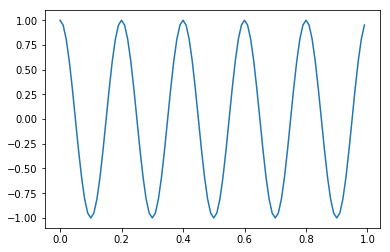

In [2]:
A = 0
B = 1
NUM_SAMPLES = 100
FREQ = 5

x = np.linspace(A, B, num=NUM_SAMPLES, endpoint=False)
f = np.cos(2 * np.pi * FREQ * x)
plt.plot(x, f)
plt.show()

Now let us take the DFT of this cosine function. 

`scipy` has an efficient set of functions implemented to support DFT, which are even named after their Matlab alternatives.

frequencies:
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]
frequencies after shift:
[-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37.
 -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  

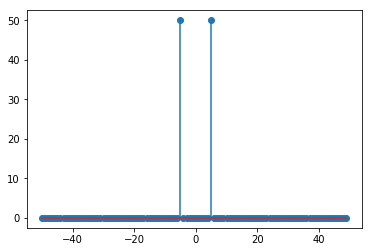

In [3]:
SAMPLE_SPACING = (B - A) / NUM_SAMPLES

dft_f = fftpack.fftshift(fftpack.fft(f))
freqs = fftpack.fftfreq(len(f), d=SAMPLE_SPACING)
print('frequencies:')
print(freqs)
print('frequencies after shift:')
freqs = fftpack.fftshift(freqs)
print(freqs)

plt.stem(freqs, abs(dft_f))
plt.show()

We could have expected this result, since
$$\frac{1}{2}\phi_\xi+\frac{1}{2}\phi_{-\xi} = \frac{1}{2}e^{2\pi i \xi x} + \frac{1}{2}e^{-2\pi i \xi x} = \textit{Re}\left(e^{2\pi i \xi x}\right) = \cos\left(2\pi \xi x\right)$$
while the different coefficients we actually got (the $y$-axis in the last graph) depend on the actual normaliztion of the harmonics.

Try playing with the constant `FREQ`. What will we get for `FREQ = 0`?

Let's try another signal:

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


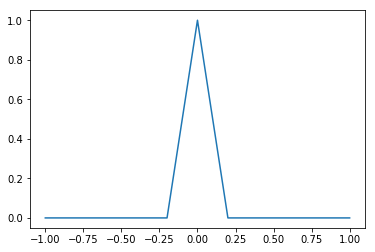

In [4]:
A = -1
B = 1
NUM_SAMPLES = 11

x = np.linspace(A, B, num=NUM_SAMPLES)
f = np.zeros(len(x))
f[len(x) // 2] = 1
print(f)

plt.plot(x, f)
plt.show()

This is the discrete version of Dirac's delta. Let's plot its Foureir transform:

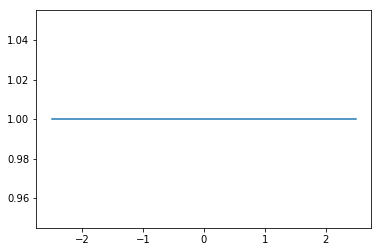

In [5]:
SAMPLE_SPACING = (B - A) / NUM_SAMPLES

dft_f = fftpack.fftshift(fftpack.fft(f))
freqs = fftpack.fftshift(fftpack.fftfreq(len(x), d=SAMPLE_SPACING))

plt.plot(freqs, np.abs(dft_f))
plt.show()

This matches the relation $\delta \leftrightarrow^\mathcal{F} 1$.

Now let's have a look at the box signal:

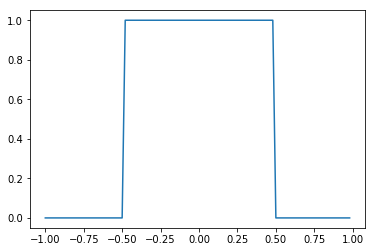

In [6]:
A = -1
B = 1
NUM_SAMPLES = 100
BOX_SIZE = 1

x = np.linspace(A, B, num=NUM_SAMPLES, endpoint=False)
f = np.zeros(len(x))
f[np.abs(x) < BOX_SIZE / 2] = 1

plt.plot(x, f)
plt.show()

and its Fourier transform:

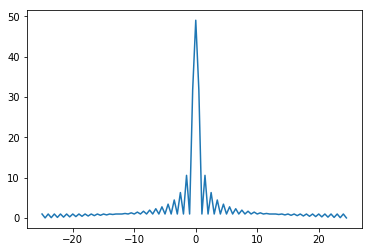

In [7]:
SAMPLE_SPACING = (B - A) / NUM_SAMPLES

dft_f = fftpack.fftshift(fftpack.fft(f))
freqs = fftpack.fftshift(fftpack.fftfreq(len(x), d=SAMPLE_SPACING))

plt.plot(freqs, np.abs(dft_f))
plt.show()

This matches the relation $\textit{box}\leftrightarrow^\mathcal{F}\textit{sinc}$.

Try playing with `BOX_SIZE` and see how it affects the Fourier transform. What will we get for very small positive values?

**Question:** What will happen if you we'll look at the real value of the Fourier transform instead of its absolute value? Try it and compare this result with what we've learned in the lecture.

## 2D Fourier transform 

### Matrix representation

The DFT of a discrete and finite 2D signal $F$ is
$$
\hat{F}\left[u,v\right] = \sum_{n=0}^{N-1} \sum_{m=0}^{M-1} F\left[n,m\right] e^{-2\pi i \left(\frac{un}{N}+\frac{vm}{M}\right)}
$$

This can also be written as
$$
\hat{F}\left[u,v\right] = \sum_{m=0}^{M-1} \left(\sum_{n=0}^{N-1} F\left[n,m\right] e^{-2\pi i \frac{un}{N}} \right) e^{-2\pi i \frac{vm}{M}} = \mathbf{WFW}
$$

This property is known as the separbility of the Fourier transform.

Let us look at a few such haromincs $e^{-2\pi i \left(\frac{un}{N}+\frac{vm}{M}\right)}$.

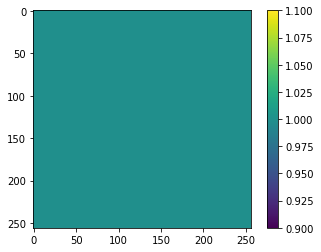

In [8]:
def harmonics(u, v, n=256):
    harmonic = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            harmonic[i, j] = np.real(np.exp(-2j * np.pi * (u * i + v * j) / n))
            
    return harmonic

plt.imshow(harmonics(0, 0))
plt.colorbar()
plt.show()

### Examples

Let us examine the 2D box signal.

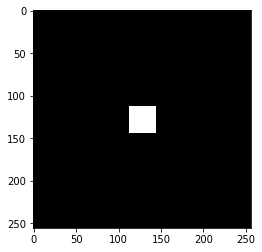

In [9]:
IMAGE_SIZE = 256
BOX_SIZE = 30

box = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
start = IMAGE_SIZE // 2 - BOX_SIZE // 2
end = start + BOX_SIZE
box[start:end + 1, start:end + 1] = 1

plt.imshow(box, cmap='gray')
plt.show()

Its 2D Fourier transform is:

/Users/omerd/miniconda3/envs/cs236860-tutorials/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


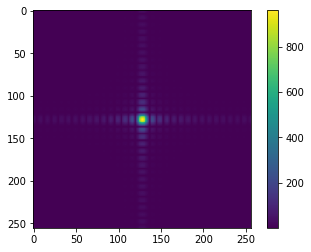

In [10]:
dft_box = fftpack.fftshift(fftpack.fftn(box))
plt.imshow(np.abs(dft_box))
plt.colorbar()
plt.show()

Let's move on to experiment with images.

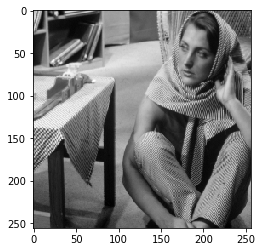

In [11]:
WHITE_LEVEL = 255

barbara = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE).astype(float) / WHITE_LEVEL
barbara = cv2.resize(barbara, (256, 256))
plt.imshow(barbara, cmap='gray')

Displaying the DFT as an image yields:

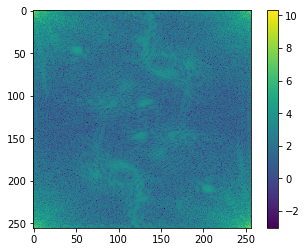

In [12]:
dft_barbara = fftpack.fftn(barbara)
plt.imshow(np.log(np.abs(dft_barbara)))
plt.colorbar()
plt.show()

Now let's display it using `fftshift`.

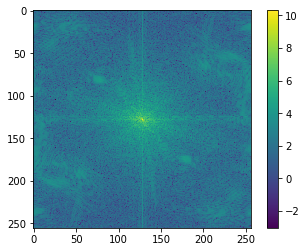

In [13]:
shifted_dft_barbara = fftpack.fftshift(fftpack.fftn(barbara))
plt.imshow(np.log(np.abs(shifted_dft_barbara)))
plt.colorbar()
plt.show()

So basically `fftshift` flips all the quadrants with respect to the origin such that the low frequency content is centralized.

Let's try examining an image with high frequency patterns.

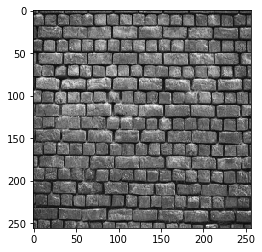

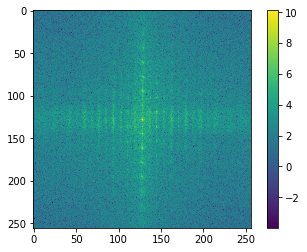

In [14]:
bricks = cv2.imread('bricks.jpeg', cv2.IMREAD_GRAYSCALE).astype(float) / WHITE_LEVEL
bricks = cv2.resize(bricks, (256, 256))
plt.imshow(bricks, cmap='gray')
plt.show()

shifted_dft_bricks = fftpack.fftshift(fftpack.fftn(bricks))
plt.imshow(np.log(np.abs(shifted_dft_bricks)))
plt.colorbar()
plt.show()

And now let's try a smooth image.

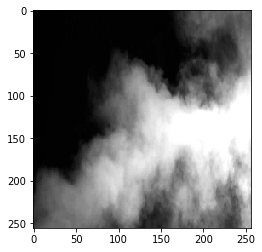

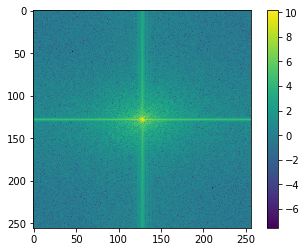

In [15]:
smoke = cv2.imread('smoke.jpeg', cv2.IMREAD_GRAYSCALE).astype(float) / WHITE_LEVEL
smoke = cv2.resize(smoke, (256, 256))
plt.imshow(smoke, cmap='gray')
plt.show()

shifted_dft_smoke = fftpack.fftshift(fftpack.fftn(smoke))
plt.imshow(np.log(np.abs(shifted_dft_smoke)))
plt.colorbar()
plt.show()

### Reconstruction

Until now, we were just looking at the absolute value to visualize the DFT. Now let's see what the phase gives us.

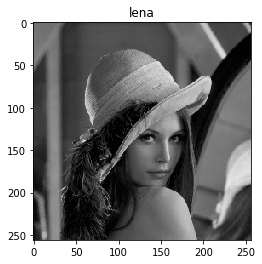

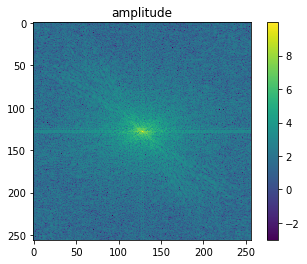

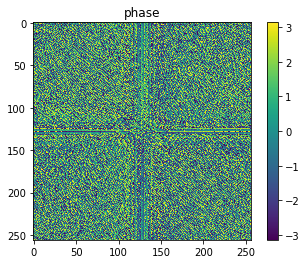

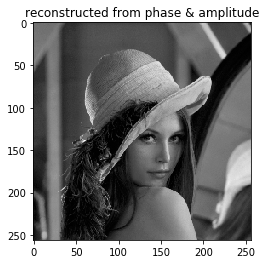

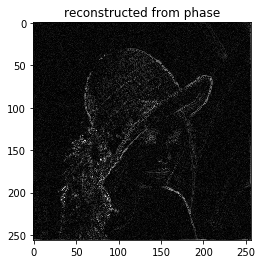

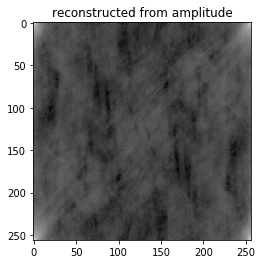

In [16]:
lena = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE).astype(float) / WHITE_LEVEL
lena = cv2.resize(lena, (256, 256))
plt.imshow(lena, cmap='gray')
plt.title('lena')
plt.show()

dft_lena = fftpack.fftn(lena)
amplitude = np.abs(dft_lena)
plt.imshow(np.log(fftpack.fftshift(amplitude)))
plt.title('amplitude')
plt.colorbar()
plt.show()

phase = np.angle(dft_lena)
plt.imshow(fftpack.fftshift(phase))
plt.title('phase')
plt.colorbar()
plt.show()

fft = amplitude * np.exp(1j * phase)
plt.imshow(np.real(fftpack.ifftn(fft)), cmap='gray')
plt.title('reconstructed from phase & amplitude')
plt.show()

only_phase = np.exp(1j * phase)
plt.imshow(np.abs(fftpack.ifftn(only_phase)), cmap='gray')
plt.title('reconstructed from phase')
plt.show()

only_amp = amplitude
plt.imshow(np.log(np.abs(fftpack.ifftn(only_amp))), cmap='gray')
plt.title('reconstructed from amplitude')
plt.show()

Let's take this a step further, and try to mix the amplitude from one image with the phase from another.

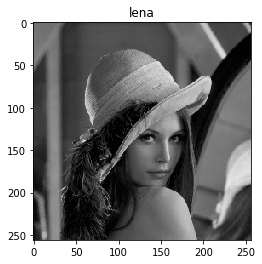

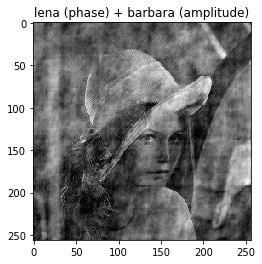

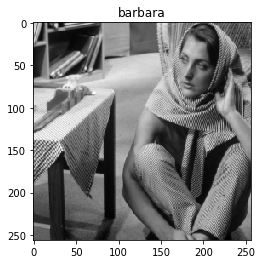

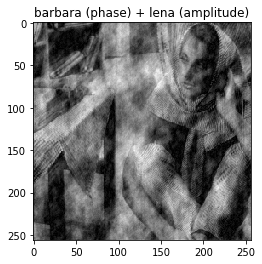

In [17]:
amplitude_lena = np.abs(dft_lena)
amplitude_barbara = np.abs(dft_barbara)

phase_lena = np.angle(dft_lena)
phase_barbara = np.angle(dft_barbara)

mix1 = amplitude_barbara * np.exp(1j * phase_lena)
mix2 = amplitude_lena * np.exp(1j * phase_barbara)

plt.imshow(lena, cmap='gray')
plt.title('lena')
plt.show()

plt.imshow(np.abs(fftpack.ifftn(mix1)), cmap='gray')
plt.title('lena (phase) + barbara (amplitude)')
plt.show()

plt.imshow(barbara, cmap='gray')
plt.title('barbara')
plt.show()

plt.imshow(np.abs(fftpack.ifftn(mix2)), cmap='gray')
plt.title('barbara (phase) + lena (amplitude)')
plt.show()

### Filtering in the frequency domain

Filtering in the frequency domain allows us to select which range of frequencies we want to preserve in the image.

For example, let's try to get rid of the low frequencies. This is known as a **high-pass filter**.

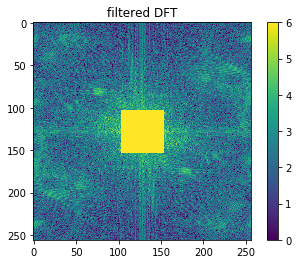

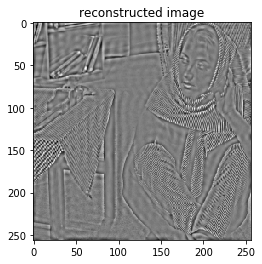

In [18]:
BOX_SIZE = 50
HALF_BOX_SIZE = BOX_SIZE // 2
EPSILON = 0.001

middle = np.array(barbara.shape) // 2
start = middle - HALF_BOX_SIZE
end = middle + HALF_BOX_SIZE
shifted_dft_high_pass = shifted_dft_barbara.copy()
shifted_dft_high_pass[start[0]:end[0] + 1, start[1]:end[1] + 1] = 0

plt.imshow(np.abs(np.log(shifted_dft_high_pass + EPSILON)).astype(int))
plt.title('filtered DFT')
plt.colorbar()
plt.show()

high_pass = fftpack.ifft2(fftpack.ifftshift(shifted_dft_high_pass)).real

plt.figure()
plt.imshow(high_pass, cmap='gray')
plt.title('reconstructed image')
plt.show()

The filtering can be done using pointwise matrix multiplication as well.

Let's use this to get rid of the high frequencies. This is known as a **low-pass filter**.

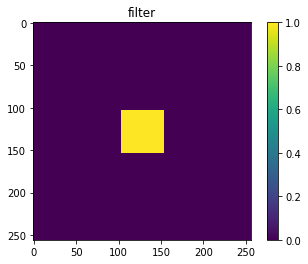

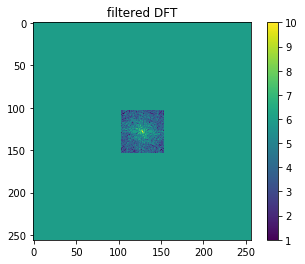

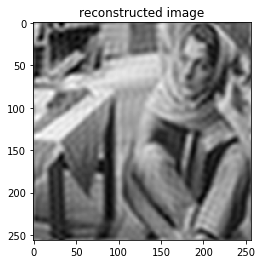

In [19]:
BOX_SIZE = 50
HALF_BOX_SIZE = BOX_SIZE // 2
EPSILON = 0.001

middle = np.array(barbara.shape) // 2
start = middle - HALF_BOX_SIZE
end = middle + HALF_BOX_SIZE

low_pass_filter = np.zeros(barbara.shape)
low_pass_filter[start[0]:end[0] + 1, start[1]:end[1] + 1] = 1
plt.imshow(low_pass_filter)
plt.title('filter')
plt.colorbar()
plt.show()

shifted_dft_low_pass = shifted_dft_barbara * low_pass_filter
plt.imshow(np.abs(np.log(shifted_dft_low_pass + EPSILON)).astype(int))
plt.title('filtered DFT')
plt.colorbar()
plt.show()

low_pass = fftpack.ifft2(fftpack.ifftshift(shifted_dft_low_pass)).real
plt.figure()
plt.imshow(low_pass, cmap='gray')
plt.title('reconstructed image')
plt.show()

As we know from the lecture, low-pass filtering can also be implemented by convolving the image in the spatial domain using the $\textit{sinc}$ kernel.

The task of converting low-pass images to their original versions is called _image super-resolution_. It is a very important problem in image processing, and is still being researched till date. This problem is realistic because the process of taking an image with an unfocused camera produces a similar effect to the low-pass filter. The challenge is to retrieve the image's edges and fine details which were not captured properly.